In [75]:
import os


#获取该目录下所有文件，存入列表中
path= "c:\\data\\bayus\\img/"
f=os.listdir(path)

n=0
for i in f:
    
    #设置旧文件名（就是路径+文件名）
    oldname=path+f[n]
    
    #设置新文件名
    newname=path+'img'+str(n)+'.jpg'
    
    #用os模块中的rename方法对文件改名
    os.rename(oldname,newname)
    n+=1
    
    


In [6]:
import cv2
import numpy as np
#from compiler.ast import flatten
import sys
from PIL import Image
import collections
import matplotlib.pyplot as plt
%matplotlib inline

def flatten(lst):
    """Flattens a list of lists"""
    return [subelem for elem in lst 
                    for subelem in elem]

def pHash(imgfile):
    """get image pHash value"""
    #加载并调整图片为32x32灰度图片
    img=cv2.imread(imgfile, 0) 
    img=cv2.resize(img,(64,64),interpolation=cv2.INTER_CUBIC)

        #创建二维列表
    h, w = img.shape[:2]
    vis0 = np.zeros((h,w), np.float32)
    vis0[:h,:w] = img       #填充数据

    #二维Dct变换
    vis1 = cv2.dct(cv2.dct(vis0))
    #cv.SaveImage('a.jpg',cv.fromarray(vis0)) #保存图片
    vis1.resize(32,32)

    #把二维list变成一维list
    img_list=flatten(vis1.tolist()) 

    #计算均值
    avg = sum(img_list)*1./len(img_list)
    avg_list = ['0' if i<avg else '1' for i in img_list]

    #得到哈希值
    return ''.join(['%x' % int(''.join(avg_list[x:x+4]),2) for x in range(0,32*32,4)])

def hammingDist(s1, s2):
    assert len(s1) == len(s2)
    return sum([ch1 != ch2 for ch1, ch2 in zip(s1, s2)])

def phash_score (path1, path2):
    HASH1=pHash(path1)
    HASH2=pHash(path2)
    out_score = 1 - hammingDist(HASH1,HASH2)*1. / (32*32/4)
    
    return out_score
#out_score =hammingDist(HASH1,HASH2)

path1='C:\\data\\bayus\\img\\img3.JPG'
path2='C:\\data\\bayus\\img\\img6.jpg'
phash_score(path1, path2)


0.921875

In [27]:
import cv2
import numpy as np
import sys
from PIL import Image
import pandas as pd
from pandas import DataFrame,Series

def dhash(imagefile, hash_size = 8):
        # Grayscale and shrink the image in one step.
    image = Image.open(imagefile)
    image = image.convert('L').resize(
            (hash_size + 1, hash_size),
            Image.ANTIALIAS,
        )
    pixels = list(image.getdata())
# Compare adjacent pixels.
    difference = []
    for row in range(hash_size):
        for col in range(hash_size):
            pixel_left = image.getpixel((col, row))
            pixel_right = image.getpixel((col + 1, row))
            difference.append(pixel_left > pixel_right)
# Convert the binary array to a hexadecimal string.
    decimal_value = 0
    hex_string = []
    for index, value in enumerate(difference):
        if value:
            decimal_value += 2**(index % 8)
        if (index % 8) == 7:
            hex_string.append(hex(decimal_value)[2:].rjust(2, '0'))
            decimal_value = 0
    return ''.join(hex_string)

def hammingDist(s1, s2):
    assert len(s1) == len(s2)
    return sum([ch1 != ch2 for ch1, ch2 in zip(s1, s2)])

def dhash_score (path1, path2):
    HASH1=dhash(path1)
    HASH2=dhash(path2)
    out_score = 1 - hammingDist(HASH1,HASH2)*1. / (32*32/4)
    return out_score
#out_score =hammingDist(HASH1,HASH2)

# path1='C:\\data\\bayus\\img\\a23.JPG'
# path2='C:\\data\\bayus\\img\\a24.JPG'
# dhash_score(path1, path2)

column=[]
index=[]
for i in range(20):
    column.append('img'+str(i))
    index.append('img'+str(i))
column
index
frame=DataFrame(columns=column, index=index)
frame


,img0,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11,img12,img13,img14,img15,img16,img17,img18,img19
img0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(len(frame.img0)):
    for j in range(len(frame.img0)):
        pathimg='C:\\data\\bayus\\img/'
        p1=pathimg+'img'+str(i)+'.jpg'
        p2=pathimg+'img'+str(j)+'.jpg'
        frame['img'+str(i)][j]=dhash_score(p1,p2)
frame

    

,img0,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11,img12,img13,img14,img15,img16,img17,img18,img19
img0,1,0.957031,0.9375,0.96875,0.949219,0.949219,0.96875,0.945312,0.964844,0.945312,0.957031,0.945312,0.945312,0.953125,0.960938,0.96875,0.964844,0.945312,0.945312,0.949219
img1,0.957031,1,0.9375,0.953125,0.953125,0.960938,0.953125,0.941406,0.957031,0.941406,0.957031,0.941406,0.957031,0.976562,0.960938,0.953125,0.957031,0.945312,0.945312,0.972656
img2,0.9375,0.9375,1,0.941406,0.9375,0.9375,0.941406,0.9375,0.941406,0.9375,0.9375,0.9375,0.9375,0.9375,0.941406,0.941406,0.9375,0.9375,0.9375,0.9375
img3,0.96875,0.953125,0.941406,1,0.960938,0.957031,1,0.941406,0.976562,0.949219,0.972656,0.949219,0.945312,0.949219,0.976562,1,0.960938,0.949219,0.949219,0.957031
img4,0.949219,0.953125,0.9375,0.960938,1,0.945312,0.960938,0.957031,0.953125,0.953125,0.953125,0.953125,0.957031,0.957031,0.960938,0.960938,0.953125,0.953125,0.953125,0.957031
img5,0.949219,0.960938,0.9375,0.957031,0.945312,1,0.957031,0.949219,0.953125,0.941406,0.953125,0.9375,0.953125,0.964844,0.957031,0.957031,0.960938,0.945312,0.941406,0.964844
img6,0.96875,0.953125,0.941406,1,0.960938,0.957031,1,0.941406,0.976562,0.949219,0.972656,0.949219,0.945312,0.949219,0.976562,1,0.960938,0.949219,0.949219,0.957031
img7,0.945312,0.941406,0.9375,0.941406,0.957031,0.949219,0.941406,1,0.9375,0.953125,0.945312,0.949219,0.949219,0.945312,0.941406,0.941406,0.941406,0.953125,0.949219,0.941406
img8,0.964844,0.957031,0.941406,0.976562,0.953125,0.953125,0.976562,0.9375,1,0.941406,0.980469,0.941406,0.949219,0.953125,0.988281,0.976562,0.957031,0.945312,0.945312,0.957031
img9,0.945312,0.941406,0.9375,0.949219,0.953125,0.941406,0.949219,0.953125,0.941406,1,0.941406,0.988281,0.945312,0.945312,0.945312,0.949219,0.941406,0.984375,0.984375,0.941406


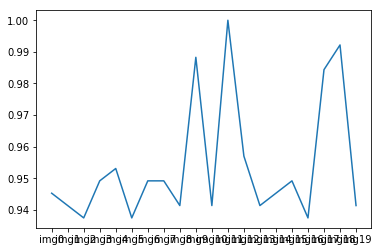

In [29]:
plt.plot(index,frame.img11)
plt.show()

In [7]:
column=[]
index=[]
for i in range(20):
    column.append('img'+str(i))
    index.append('img'+str(i))

frame=DataFrame(columns=column, index=index)
for i in range(len(frame.img0)):
    for j in range(len(frame.img0)):
        pathimg='C:\\data\\bayus\\img/'
        p1=pathimg+'img'+str(i)+'.jpg'
        p2=pathimg+'img'+str(j)+'.jpg'
        frame['img'+str(i)][j]=phash_score(p1,p2)
frame


,img0,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11,img12,img13,img14,img15,img16,img17,img18,img19
img0,1,0.964844,0.6875,0.9375,0.976562,0.972656,0.96875,0.945312,0.960938,0.84375,0.96875,0.824219,0.910156,0.972656,0.964844,0.957031,0.964844,0.84375,0.820312,0.964844
img1,0.964844,1,0.691406,0.9375,0.96875,0.964844,0.945312,0.964844,0.96875,0.839844,0.972656,0.828125,0.925781,0.976562,0.964844,0.949219,0.957031,0.847656,0.824219,0.976562
img2,0.6875,0.691406,1,0.671875,0.691406,0.683594,0.683594,0.691406,0.691406,0.613281,0.695312,0.617188,0.671875,0.683594,0.683594,0.683594,0.6875,0.625,0.621094,0.691406
img3,0.9375,0.9375,0.671875,1,0.929688,0.933594,0.921875,0.917969,0.941406,0.832031,0.921875,0.832031,0.914062,0.949219,0.9375,0.914062,0.917969,0.835938,0.824219,0.929688
img4,0.976562,0.96875,0.691406,0.929688,1,0.96875,0.964844,0.953125,0.945312,0.84375,0.972656,0.824219,0.90625,0.972656,0.96875,0.96875,0.976562,0.84375,0.820312,0.953125
img5,0.972656,0.964844,0.683594,0.933594,0.96875,1,0.96875,0.949219,0.953125,0.839844,0.96875,0.824219,0.90625,0.976562,0.984375,0.976562,0.980469,0.84375,0.820312,0.972656
img6,0.96875,0.945312,0.683594,0.921875,0.964844,0.96875,1,0.953125,0.949219,0.839844,0.964844,0.824219,0.890625,0.957031,0.953125,0.976562,0.976562,0.84375,0.820312,0.953125
img7,0.945312,0.964844,0.691406,0.917969,0.953125,0.949219,0.953125,1,0.957031,0.84375,0.945312,0.828125,0.90625,0.949219,0.957031,0.949219,0.957031,0.847656,0.824219,0.964844
img8,0.960938,0.96875,0.691406,0.941406,0.945312,0.953125,0.949219,0.957031,1,0.839844,0.957031,0.832031,0.921875,0.964844,0.945312,0.941406,0.945312,0.851562,0.828125,0.957031
img9,0.84375,0.839844,0.613281,0.832031,0.84375,0.839844,0.839844,0.84375,0.839844,1,0.839844,0.878906,0.820312,0.84375,0.84375,0.84375,0.84375,0.902344,0.902344,0.835938


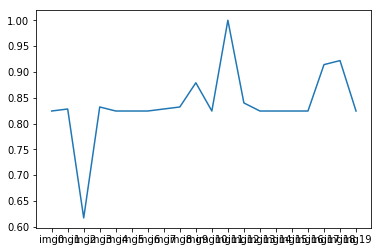

In [8]:
plt.plot(index,frame.img11,)
plt.show()